# Function Fitting with `lmfit`

Now that we have some data inside our program and can visualise it, two key principles remain:

 - Doing something with the data
 - Saving results to disk
 
This tutorial is designed to address both of these, in turn using some simulated data and `lmfit` a function fitting package ([LMFIT: Non-Linear Least-Squares Minimization and Curve-Fitting for Python](https://lmfit.github.io/lmfit-py/)).

Before fitting any data we need some data - whereas we do have some from the previous tutorial to start with we shall generate some data, add some noise and attempt a fit upon this data in the first instance.

To do this we first need an `x_axis` dataset which we shall generate using `numpy`s `linspace()` function ([https://numpy.org/doc/stable/reference/generated/numpy.linspace.html](numpy.linspace)).

However, as before, let's set up Colab:

In [ ]:
!pip install h5py
!pip install lmfit
!pip install numpy
!pip install matplotlib

!git clone https://github.com/timsnow/advanced_sas_training_course
%cd 'advanced_sas_training_course/02 - Data Handling and Plotting'

Now we can start with our code:

In [1]:
import numpy as np

x_axis = np.linspace(start = 0, stop = 100, num = 1000)
print(x_axis[::100])

[ 0.         10.01001001 20.02002002 30.03003003 40.04004004 50.05005005
 60.06006006 70.07007007 80.08008008 90.09009009]


As you can see the `linspace` function has provided 1000 linearly spaced points between 0 and 100, as requested.

Using these values we are able to create a `y_axis` dataset given a particular function. For this example we shall use a Gaussian function ([Gaussian Function](https://en.wikipedia.org/wiki/Gaussian_function)) which, firstly we will need to define:

In [2]:
def gaussian_function(x_axis, a, b, c):
    return a * np.exp(-((x_axis - b)**2 / (2 * c**2)))

The input parameters a, b and c correspond to:

 - a - the height of the curve's peak
 - b - the position of the center of the peak and 
 - c - the standard deviation, sometimes called the Gaussian RMS width (controls the width of the "bell")
 
Using this with our `x_axis` dataset will allow us to create a very neat Gaussian profile:

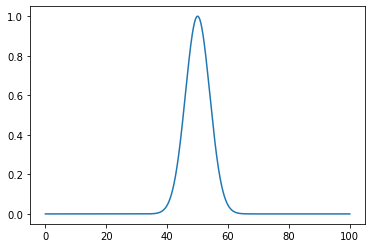

In [3]:
import matplotlib.pyplot as plt

y_axis = gaussian_function(x_axis, 1, 50, 4)

plt.plot(x_axis, y_axis)
plt.show()

However, in real life peaks are never this clean so we shall also add some *noise* to do this, let's create a function that calls our `gaussian_function`:

In [21]:
def noisy_gaussian_function(x_axis, a, b, c, noise_factor):
    length_of_x_axis = len(x_axis)
    noise_to_add = np.random.randn(length_of_x_axis) * noise_factor
    return gaussian_function(x_axis, a, b, c) + noise_to_add

In this function we first determine the length of the incoming `x_array` using `len()` (documentation: [len()](https://docs.python.org/3/library/functions.html#len)) then we generate an array of random numbers, using `numpy`s random number generator `random.randn()` (documentation: [numpy.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)), and then multiplying these values by a factor - so that we can tune the amount of noise.

We then take this array of noise and add it to the Gaussian function that we created earlier and:

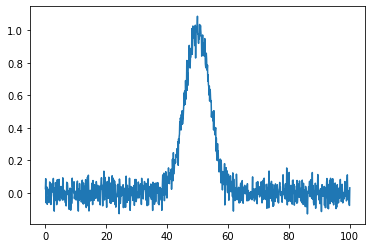

In [24]:
y_axis = noisy_gaussian_function(x_axis, 1, 50, 4, 0.05)

plt.plot(x_axis, y_axis)
plt.show()

Now we have some *noisy* data that we can fit. As we know that we have a Gaussian peak we can *cheat* slightly by using one of `lmfit`s in-built models - the `GaussianModel()` (documentation: [Built-in Fitting Models in lmfit](https://lmfit.github.io/lmfit-py/builtin_models.html))

In [6]:
from lmfit.models import *

gaussian_model = GaussianModel()
initial_guesses = gaussian_model.guess(data = y_axis, x = x_axis)
gaussian_fit = gaussian_model.fit(data = y_axis, params = initial_guesses, x = x_axis)

As can be seen above to use a built-in model, and the `lmfit` standard parameter guessing function, is relatively straightforward. 

The first thing (after imports) that we do is to *instanciate* a `GaussianModel()` class. This is slightly different from what we've been doing until now as we've been assigning values to variables and calling functions. This assignment is a bit different as we're assigning a Python class to a variable.

A class, and it's ability to hold many variables and methods (and sub-variables and sub-methods) is the basis of 'Object Oriented Programming'. Whereas this is a *very* rich topic, this is also a very short course so we shall leave a link to the [Classes page on the Python documentation site here](https://docs.python.org/3/tutorial/classes.html). Using classes isn't essential to Python programming but offer many powerful programming patterns and paradigms to be accessed.

For now, just be aware that this variable assignment is a little different as the variable has sub-variables and functions that we can access via use of the 'dot' notation *i.e.* `variable.function()` or `variable.sub_variable`

With this in mind we can instanciate a `GaussianModel()` class, ask it to perform a guess of the initial parameters against your data (more on this in a bit) and then ask it to fit the data.

Question is... how did it do?

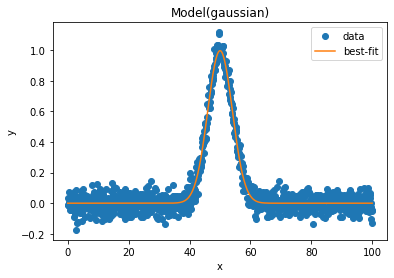

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 1000
    # variables        = 3
    chi-square         = 2.38393677
    reduced chi-square = 0.00239111
    Akaike info crit   = -6033.00205
    Bayesian info crit = -6018.27879
[[Variables]]
    amplitude:  10.1056593 +/- 0.07170474 (0.71%) (init = 20.58422)
    center:     50.0285696 +/- 0.03309927 (0.07%) (init = 50.04702)
    sigma:      4.03986119 +/- 0.03309928 (0.82%) (init = 5.305305)
    fwhm:       9.51314593 +/- 0.07794284 (0.82%) == '2.3548200*sigma'
    height:     0.99794889 +/- 0.00708094 (0.71%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) =  0.577


In [7]:
gaussian_fit.plot_fit()
plt.show()
print(gaussian_fit.fit_report())

Looking at the fit to the data, and also the parameters - it did pretty well:

 - a = 1 / height = 0.99
 - b = 50 / center = 49.97
 - c = 4 / sigma = 4.05
 
It's worth noting that the values obtained above might vary *slightly* to the ones obtained when this is re-run as we're applying **random** noise to the input data. However, rounded to the nearest integer they are spot on their original values.

If you require to access the values in code, this can be achieved by retrieving the parameter dictionary from the fitted result which can be found in the `result` function under `params` from here you can then inspect and/or retrieve the fitted values *and* the bounds that might have been applied when fitting that parameter:

In [8]:
result_dictionary = gaussian_fit.result.params
print('Results Dictionary:')
print(result_dictionary)
print('\nFitted Amplitude:')
print(result_dictionary['amplitude'].value)

Results Dictionary:
Parameters([('amplitude', <Parameter 'amplitude', value=10.105659345853017 +/- 0.0717, bounds=[-inf:inf]>), ('center', <Parameter 'center', value=50.028569589064055 +/- 0.0331, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=4.03986118946735 +/- 0.0331, bounds=[0.0:inf]>), ('fwhm', <Parameter 'fwhm', value=9.513145926181506 +/- 0.0779, bounds=[-inf:inf], expr='2.3548200*sigma'>), ('height', <Parameter 'height', value=0.9979488881851051 +/- 0.00708, bounds=[-inf:inf], expr='0.3989423*amplitude/max(1e-15, sigma)'>)])

Fitted Amplitude:
10.105659345853017


Which neatly brings us on to setting your own initial guesses *and* limits on the values to fit. Firstly we can call on the model to provide us with a parameter dictionary:

In [9]:
new_gaussian_model = GaussianModel()
initial_guesses = new_gaussian_model.make_params()

We can then have a look at the keys, either programatically or visually (as here):

In [10]:
print(initial_guesses.keys())

odict_keys(['amplitude', 'center', 'sigma', 'fwhm', 'height'])


Next we can set each of these keys using their `value`, `min` and `max` parameters - additionally by setting the `vary` boolean we can specify to `lmfit` whether a parameter should be fitted at all. For our existing dataset let's put in the following:

In [11]:
for key in initial_guesses.keys():
    initial_guesses[key].min = 0
    initial_guesses[key].max = 100

initial_guesses['height'].value = 1
initial_guesses['center'].value = 50
initial_guesses['center'].vary = False

To start with we've just iterated through all of the parameters and set the bounds to the bound of the dataset - perhaps not the best bound but better than +/- infinity.

Secondly we've seeded the height and center parameters with values of 1 and 50, respectively, and fixed the center value as, let's say, we know this up front. Now let's do a fit:

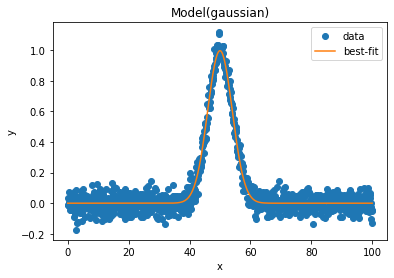

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 1000
    # variables        = 2
    chi-square         = 2.38571818
    reduced chi-square = 0.00239050
    Akaike info crit   = -6034.25508
    Bayesian info crit = -6024.43957
[[Variables]]
    amplitude:  10.1056035 +/- 0.07169611 (0.71%) (init = 1)
    center:     50 (fixed)
    sigma:      4.03991758 +/- 0.03309596 (0.82%) (init = 1)
    fwhm:       9.51327872 +/- 0.07793502 (0.82%) == '2.3548200*sigma'
    height:     0.99792945 +/- 0.00708000 (0.71%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) =  0.577


In [12]:
gaussian_fit = new_gaussian_model.fit(data = y_axis, params = initial_guesses, x = x_axis)

gaussian_fit.plot_fit()
plt.show()
print(gaussian_fit.fit_report())

Note in the parameter printout above it specifies what the starting values were (init = *x*) and, in the case of the center value, that it was fixed at a specific value.

For reference here, and more explicitly defined in the documentation here: [built-in models](https://lmfit.github.io/lmfit-py/builtin_models.html), the list of built-in models is:

 - GaussianModel
 - LorentzianModel
 - SplitLorentzianModel
 - VoigtModel
 - PseudoVoigtModel
 - MoffatModel
 - Pearson7Model
 - StudentsTModel
 - BreitWignerModel
 - LognormalModel
 - DampedOscillatorModel
 - DampedHarmonicOscillatorModel
 - ExponentialGaussianModel
 - SkewedGaussianModel
 - SkewedVoigtModel
 - ThermalDistributionModel
 - DoniachModel
 - ConstantModel
 - LinearModel
 - QuadraticModel
 - PolynomialModel
 - ineModel
 - StepModel
 - RectangleModel
 - ExponentialModel
 - PowerLawModel
 - Gaussian2dModel

Finally, we shall cover how to fit your own model using lmfit. Remembering the equation for a Gaussian from before we can create a custom `ExpressionModel` by instanciating an `ExpressionModel` object and providing it with the equation we wish to fit:

In [13]:
our_gaussian = ExpressionModel('a * exp(-(x - b)**2 / (2 * c**2))')

As you can see there are a number of 'reserved' keywords such as `x` and `exp`, however, you are free to utilise any non-mathematically common function name for your fitting variables - here I have picked `a`, `b` and `c` as in our data simulator class.

With that created we can then perform the fit and present the fit in the usual manner, with one *small* exception - the `guess()` function isn't available for custom models.

So, we must either call the `make_params()` function to generate a dictionary that we can then modify in the same way as we've just done, or we can explicitly pass to the `fit()` function the initial parameters that the fit should start with:

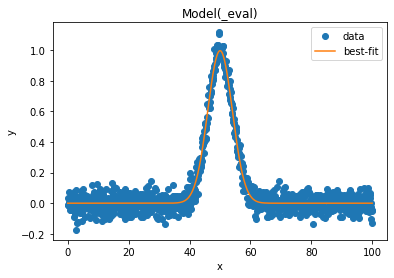

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 1000
    # variables        = 3
    chi-square         = 2.38393677
    reduced chi-square = 0.00239111
    Akaike info crit   = -6033.00205
    Bayesian info crit = -6018.27879
[[Variables]]
    a:  0.99794883 +/- 0.00708095 (0.71%) (init = 1)
    b:  50.0285696 +/- 0.03309939 (0.07%) (init = 50)
    c:  4.03986129 +/- 0.03309939 (0.82%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -0.577


In [14]:
gaussian_fit = our_gaussian.fit(data = y_axis, x = x_axis, a = 1, b = 50, c = 1)

gaussian_fit.plot_fit()
plt.show()
print(gaussian_fit.fit_report())

As before, this yields a good fit.


### Extra Credit

As this is a SAS course, you may be interested in the following *small* modification to the `noisy_gaussian_function()` - if we make the amount of noise dependent on the `x_axis` value we end up with noise that scales as you move from lower x-axis values to higher x-axis values, almost like in real SAS data...

<ipython-input-28-456a6b52aeb8>:3: RuntimeWarning: divide by zero encountered in true_divide
  noise_to_add = (np.random.randn(length_of_x_axis) * noise_factor) / (1 / x_axis)


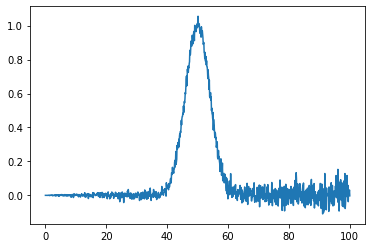

In [28]:
def noisy_gaussian_function(x_axis, a, b, c, noise_factor):
    length_of_x_axis = len(x_axis)
    noise_to_add = (np.random.randn(length_of_x_axis) * noise_factor) / (1 / x_axis)
    return gaussian_function(x_axis, a, b, c) + noise_to_add

y_axis = noisy_gaussian_function(x_axis, 1, 50, 4, 0.0005)

plt.plot(x_axis, y_axis)
plt.show()

## Saving Data

Now we have some data, we're going to need to store it somewhere, using `print()` to show what's going on in a notebook such as this is fine for small scale operations but extracting the parameters of use to put into aggregated results tables / databases / papers will quickly become a pain if you're relying on copy-and-paste (or, just typing in the results obtained into another location!).

However, before we go through the basics of how we can save data in a couple of different ways it is **vitally** important to note that the level of access this will give you to files on your computer is *vastly* different from what you might be used to.

Editing a file to make it unreadable, overwriting a file or simply outputting random "stuff" into a file (pre-existing or not) are all very possible and ***not at all*** difficult to achieve and there's no easy 'undo' feature here.

Therefore, to start with, we shall go over a few things that can help you safeguard against the most common routes towards potential accidents *however* it is always advised that you keep regular backups of your data just in case (and, to be honest, just in case a lot of other potential fatal scenarios - I'm talking about your 'sparky' relationship laptop keyboard and coffee...)

### Do things already exist?

The most basic check we can do is to see whether something already exists, this will stop us editing or overwriting a file that's already there. 

In the most blunt fashion we can achieve this by use of the `pathlib` library (documentation: [pathlib](https://docs.python.org/3/library/pathlib.html)) and doing a quick check on the file path we're about to write to and if it exists using Python's `exit()` function to halt the program:

In [2]:
from pathlib import Path

input_path = 'data/i22-363110.dat'

if Path(input_path).exists():
    print("Ack! There's a file here already! Exiting here.")
    exit()

Ack! There's a file here already! Exiting here.


Naturally, if we need a file to exist so that we can open it and append something to it (or modify it in some way) one could apply the opposing logic:

In [2]:
from pathlib import Path

input_path = 'data/i22-363110.dat'

if not (Path(input_path).exists()):
    print("Ack! There's not a file here already! Exiting here.")
    exit()

print("Let's do something with this file!")

Let's do something with this file!


Building on this theme there are many checks and potential file path alterations, to provide a unique filename, that one could do 'on the fly' to keep the program going, however, general experience highlights this as being the most effective way to stave off problems.

In essence, if you're not expecting to hit this error and you do either: you've missed something, something in your code is either playing up or you don't understand what your program is doing. 

In any scenario - it's time to do some thinking, debugging and then come back before continuing.

Thinking back to file 'modes', when opening a file for writing there are three options:

 - 'w' - Open a file for writing, will overwrite an existing file
 - 'a' - Open a file for appending data
 - 'r+' - Open a file for reading and/or writing
 
These can be used with the Python `open()` function (documentation: [Built-in Functions](https://docs.python.org/3/library/functions.html#open) like so:

In [ ]:
file_handle = open('data/new_file.txt', 'w')

At this point we can write data into the file using the file handle's `write()` function and, once we're finished, close the file using the `close()` function. A simple example of this could be:

In [ ]:
file_handle = open('data/new_file.txt', 'w')
file_handle.write('Something to store to disk.')
file_handle.close()

This pattern of `open`, `write` and `close` forms the basis of file writing in almost any programming language and Python is no exception.

One can invisage using loops to write out multiple lines of data and variable concatenation in order to build up long strings, or binary, before using the `write()` function, however, as with file loading - a number of routines already exist to handle this for you.

Both `h5py` and `numpy` have routines for saving data as binary or, in the case of `numpy`, text. 

`numpy` has two common rountines for data saving, `numpy.save()` and `numpy.savetxt()`. `save()` takes an array as input and saves it in a '.npy' file in such a way that it can be loaded back into Python by calling `numpy.load()` - it is a binary format and it's internal structure is custom: [numpy.save](https://numpy.org/doc/stable/reference/generated/numpy.save.html).

`savetxt()` behaves a lot like `loadtxt()` but, naturally, works in reverse, as it shown on the documentation for [numpy.savetxt](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html) the syntax is as follows:

In [ ]:
numpy.savetxt(file_path, array, delimiter='\t', newline='\n', header='', footer='', comments='# ')

Using the above would create a text file with results in a tab-delimited text format.


Finally, using `h5py` it is possible to output a file that contains *data* by which I mean arrays, strings, variables, *etc.* in a binary format. 

In [ ]:
file_handle = h5py.File('data/new_file.txt', 'w')
file_handle['/internal/data/path/string'] = 'Something to store to disk.'
file_handle['/internal/data/path/variable'] = variable_to_store
file_handle['/internal/data/path/numpy_array'] = np.zeros((100, 100))
file_handle.close()

This is one of the more flexible ways to save data, however, unlike a text file, can only be read by programs that can read HDF5/NeXus files.

### Further reading

When writing lots of data, or if you're writing small amounts of data over a long time and *need* it to be literally 'on disk' at that point in time you should look at the `.flush()` routine: [io routines - flush()](https://docs.python.org/3/library/io.html#io.IOBase.flush)